<a href="https://colab.research.google.com/github/Leoberta/Programming/blob/main/ParticleInBoxVariational.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports
Needed for working with widgets on google colab

In [11]:
!pip install -q ipympl

Enabling the use of third party widgets on the colab

In [12]:
from google.colab import output
output.enable_custom_widget_manager()

Real normal imports

In [13]:
import numpy as np
from scipy.integrate import quad
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider
from matplotlib import rc

#matplotlib widget

Inputs & Varibales (L = size of the cell; number of levels = Nlevels, Number of basis functions = Nmax)


In [14]:
Nlevels = 1
L = 1
Nmax = 10

Inputs for internal potential (Internal barrier between -a and +a; Internal potential = V. Default V=0, free particle case)


In [15]:
a = 0.5
V0 = 10

## Helper functions

In [16]:
def phi_var(k,x):
    return np.where(k % 2 == 0, np.sin(k*np.pi*x/(2*L)), np.cos(k*np.pi*x/(2*L)))

def H_kpk(kp,k):
    f = lambda x: phi_var(kp,x)*phi_var(k,x)
    return V0*quad(f,-a,a)[0]

def get_Hmat():
    H = np.empty([Nmax,Nmax])
    for k in range(Nmax):
        H[k,k]=((k+1)*np.pi)**2/8+H_kpk(k+1,k+1)
        for kp in range(k):
            H[kp,k]=H_kpk(kp+1,k+1)
            H[k,kp]=H[kp,k]
    return H

def PSI(C,x):
    base = phi_var(np.arange(1, len(C)+1)[:, np.newaxis], x)
    return np.sum(C[:, :, np.newaxis] * base[np.newaxis, :, :], 1)

## Main

In [17]:
def compute_var(ax1, ax2):
  print('Computing {} levels for V = {} and Nbasis = {}...'.format(Nlevels, V0, Nmax))
  x = np.linspace(-L, L)[np.newaxis, :]
  E, C = np.linalg.eigh(get_Hmat())
  y = PSI(C,x)[:Nlevels]

  for i, e in enumerate(E[:Nlevels]):
    print('E{} = {}'.format(i, e))

  ax1.plot(np.repeat(x, len(y), axis=0).T,np.square(y.T) + 1.5*np.arange(len(y)))
  ax2.plot([E[:Nlevels]]*2)

## Compute and Plot

Computing 1 levels for V = 10 and Nbasis = 10...
E0 = 7.768888345763178


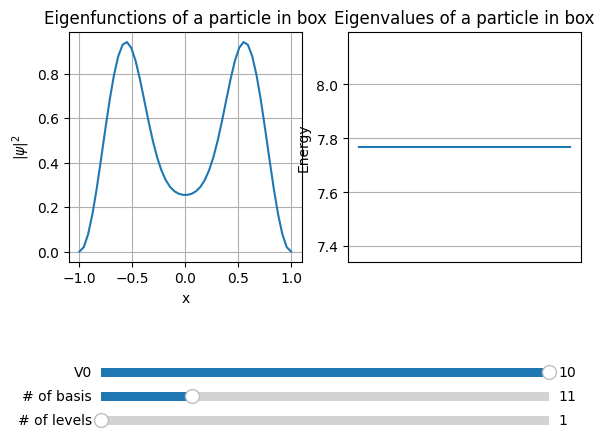

In [18]:
fig, (ax1, ax2) = plt.subplots(1, 2)
plt.subplots_adjust(left=0.1, bottom=0.4)
ax1.set(xlabel='x', ylabel=r"$|\psi|^2$", title='Eigenfunctions of a particle in box')
ax1.grid()
ax2.set(ylabel='Energy', title='Eigenvalues of a particle in box')
ax2.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
ax2.grid(axis='y')

# Setup the widgets to control some parameters (slow and inefficient but cool)
axNp = plt.axes([0.15, 0.05, 0.7, 0.04])
axNm = plt.axes([0.15, 0.1, 0.7, 0.04])
axV = plt.axes([0.15, 0.15, 0.7, 0.04])
sliderNl = Slider(axNp, '# of levels', 1, 10, valinit=Nlevels, valstep=1)
sliderNm = Slider(axNm, '# of basis', 1, 50, valinit=Nmax, valstep=5)
sliderV = Slider(axV, 'V0', 0, 10, valinit=V0, valstep=1)
def update(_):
  global Nlevels
  global Nmax
  global V0
  Nmax = sliderNm.val
  Nlevels = sliderNl.val
  V0 = sliderV.val
  ax1.clear()
  ax2.clear()
  compute_var(ax1, ax2)
  fig.canvas.draw()
  ax1.set(xlabel='x', ylabel=r"$|\psi|^2$", title='Eigenfunctions of a particle in box')
  ax1.grid()
  ax2.set(ylabel='Energy', title='Eigenvalues of a particle in box')
  ax2.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
  ax2.grid(axis='y')
sliderNm.on_changed(update)
sliderNl.on_changed(update)
sliderV.on_changed(update)

compute_var(ax1, ax2)
plt.show()

Exercise:

1) For V=10 and a=0.5 find the minimum basis set size N that guarantee a convergence to the third digit for the first (ground state) eigenvalue.

2) Verify that the convergence is more difficult (larger N) for excited states, for instance E5.

3) Verify that a larger basis set size (N) is needed to converge to the third digit for a larger potential, e.g. V=100. Why? (mind: little bug in the program to be fixed)